In [3]:
from dataset_utils import create_dataloader

# Load all DataLoaders
central_dataloader = create_dataloader("central_dataset.pkl", batch_size=32, shuffle=True)
real_dataloader = create_dataloader("real_dataset.pkl", batch_size=32, shuffle=True)
sketch_dataloader = create_dataloader("sketch_dataset.pkl", batch_size=32, shuffle=True)
clipart_dataloader = create_dataloader("clipart_dataset.pkl", batch_size=32, shuffle=True)
quickdraw_dataloader = create_dataloader("quickdraw_dataset.pkl", batch_size=32, shuffle=True)
painting_dataloader = create_dataloader("painting_dataset.pkl", batch_size=32, shuffle=True)

# Store all DataLoaders in a dictionary for easier access
dataloaders = {
    "central": central_dataloader,
    "real": real_dataloader,
    "sketch": sketch_dataloader,
    "clipart": clipart_dataloader,
    "quickdraw": quickdraw_dataloader,
    "painting": painting_dataloader
}

print("DataLoaders loaded successfully.")



DataLoaders loaded successfully.


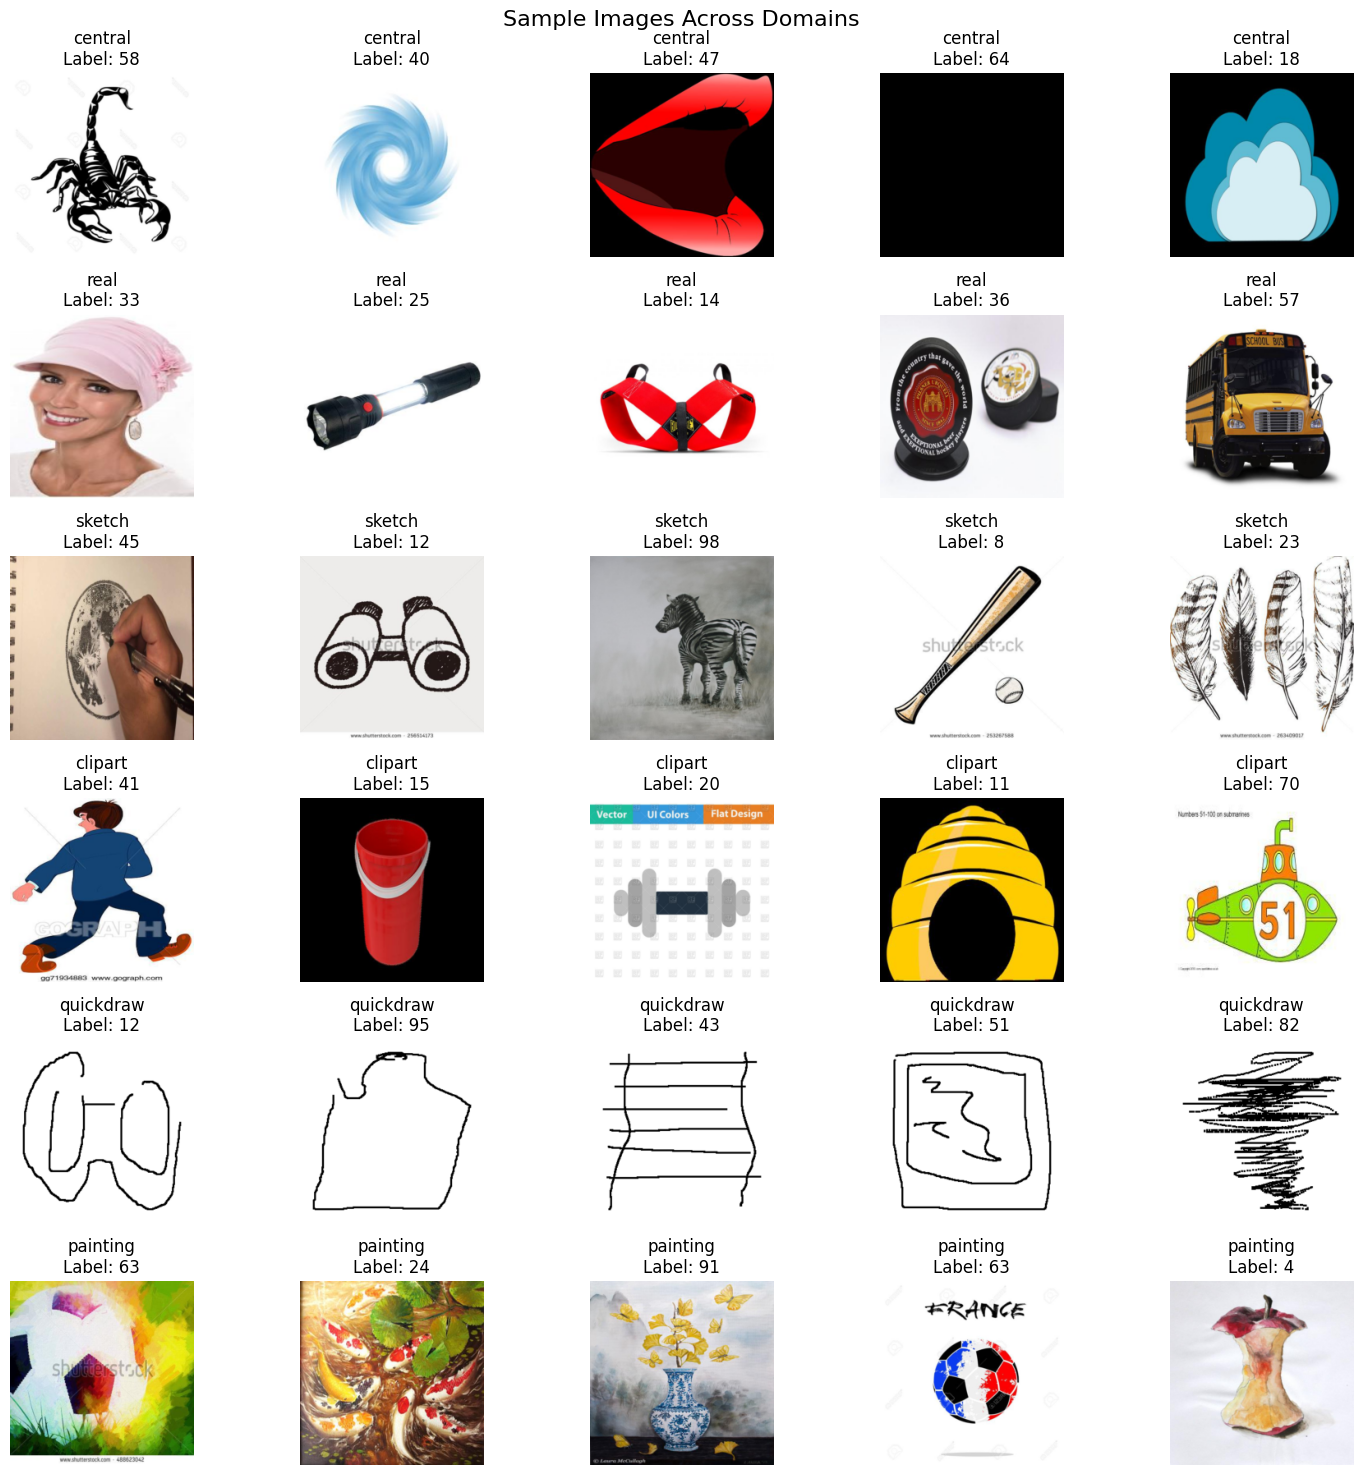

In [4]:
import matplotlib.pyplot as plt
import torch

def visualize_images(dataloaders, num_images=5):
    fig, axes = plt.subplots(len(dataloaders), num_images, figsize=(15, 15))
    fig.suptitle("Sample Images Across Domains", fontsize=16)

    for i, (domain, dataloader) in enumerate(dataloaders.items()):
        # Get one batch of data
        for images, labels in dataloader:
            for j in range(num_images):
                ax = axes[i, j] if len(dataloaders) > 1 else axes[j]
                image = images[j].permute(1, 2, 0).numpy()  # Convert to HxWxC
                label = labels[j].item()
                ax.imshow(image)
                ax.axis("off")
                ax.set_title(f"{domain}\nLabel: {label}")
            break  # Only need one batch

    plt.tight_layout()
    plt.show()

# Visualize a few images across different domains
visualize_images(dataloaders)


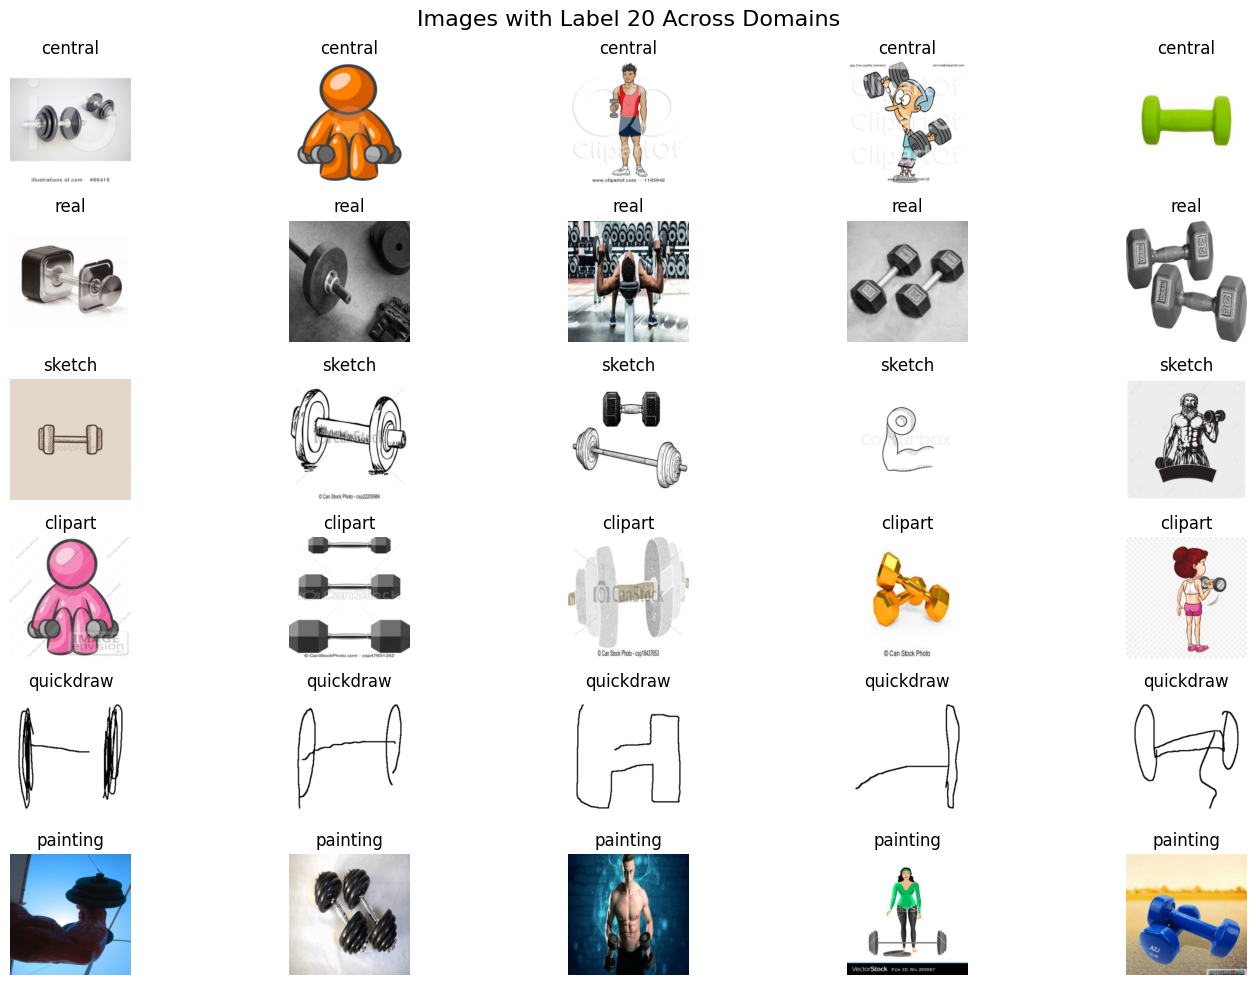

In [6]:
def visualize_same_label_across_domains(dataloaders, label_to_check, num_images_per_domain=5):
    """
    Visualize images of the same label across different domains.
    """
    fig, axes = plt.subplots(len(dataloaders), num_images_per_domain, figsize=(15, 10))
    fig.suptitle(f"Images with Label {label_to_check} Across Domains", fontsize=16)

    for i, (domain, dataloader) in enumerate(dataloaders.items()):
        domain_images_shown = 0
        for images, labels in dataloader:
            # Find indices of the specified label
            indices = (labels == label_to_check).nonzero(as_tuple=True)[0]
            for idx in indices[:num_images_per_domain - domain_images_shown]:
                ax = axes[i, domain_images_shown] if len(dataloaders) > 1 else axes[domain_images_shown]
                image = images[idx].permute(1, 2, 0).numpy()  # Convert to HxWxC
                ax.imshow(image)
                ax.axis("off")
                ax.set_title(f"{domain}")
                domain_images_shown += 1
                if domain_images_shown >= num_images_per_domain:
                    break
            if domain_images_shown >= num_images_per_domain:
                break

    plt.tight_layout()
    plt.show()

# Visualize images of a specific label (e.g., label 5) across domains
visualize_same_label_across_domains(dataloaders, label_to_check=20, num_images_per_domain=5)
